<a href="https://colab.research.google.com/github/MichalisSant/Mike_Sant/blob/main/Threat_Hunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [20]:
# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [21]:
# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

In [22]:
# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

In [23]:
# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
X = data.drop('Class', axis=1)
y = data['Class']

In [24]:
# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

/tmp/ipython-input-25-2521640087.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


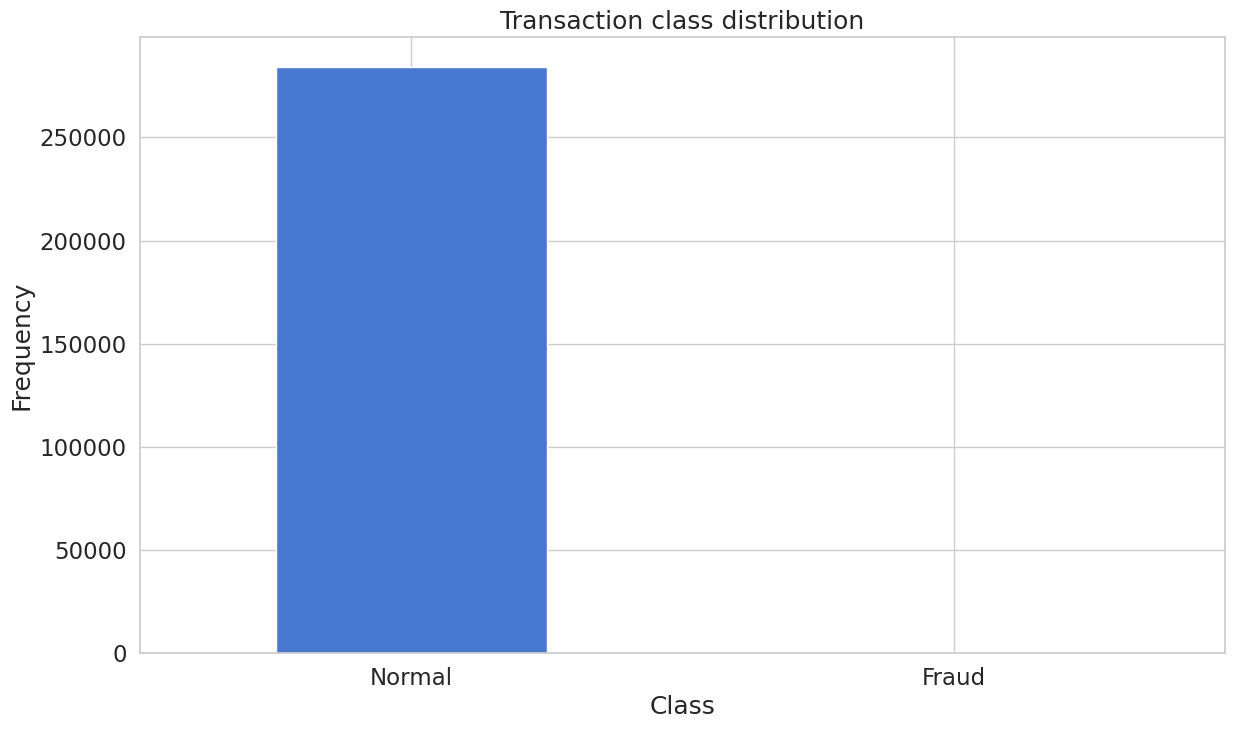

In [25]:
# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");


In [26]:
# δημιουργία Random Forest αλγορίθμου
model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

In [27]:
# εκπαίδευση αλγόριθμου
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# πρόβλεψη συνόλου δοκιμής
y_pred = model.predict(X_test)

In [29]:
# υπολογισμός μετρικών αξιολόγησης
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=LABELS))

Accuracy: 0.9995201479348805
Precision: 0.9572649572649573
Recall: 0.7567567567567568
F1 Score: 0.8452830188679246

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



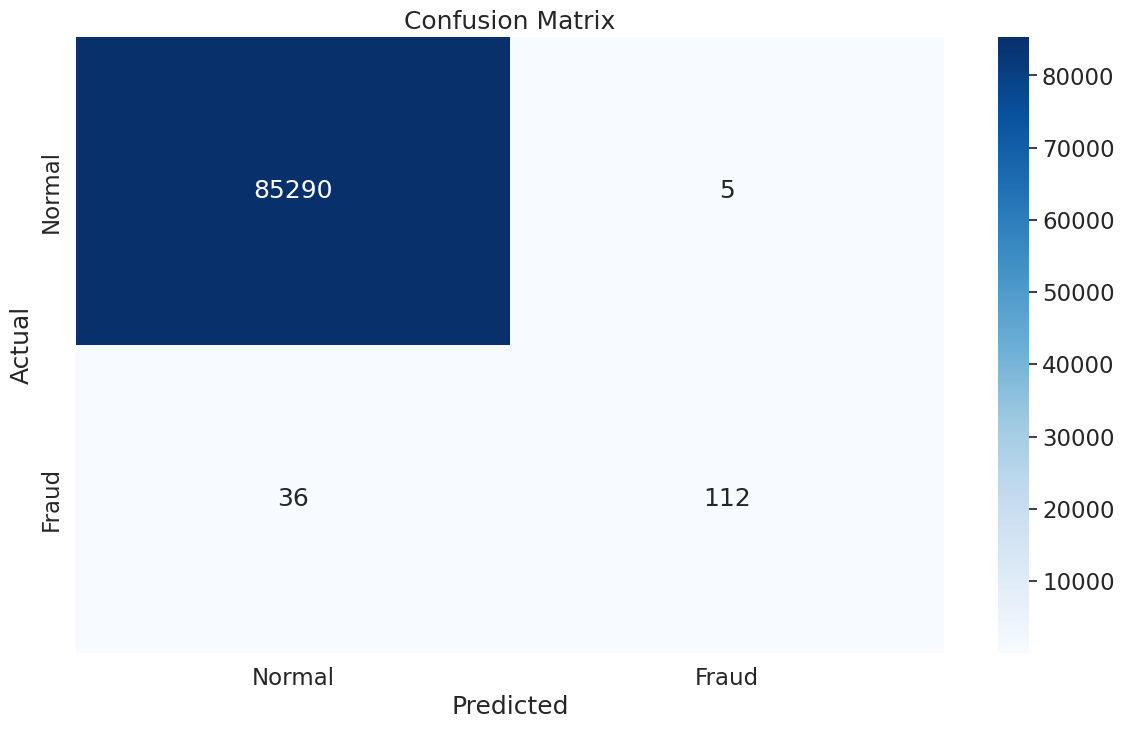

In [30]:
# απεικόνιση πίνακα σύγχυσης
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()